In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
ROOT = Path().resolve().parent
if str(ROOT) not in sys.path:
    sys.path.insert(1, str(ROOT))
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from frequency_response import FrequencyResponse
import biquad

In [23]:
def equal_loudness_contour(phon):
    f = np.array([20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500])
    af = np.array([0.532, 0.506, 0.480, 0.455, 0.432, 0.409, 0.387, 0.367, 0.349, 0.330, 0.315, 0.301, 0.288, 0.276, 0.267, 0.259, 0.253, 0.250, 0.246, 0.244, 0.243, 0.243, 0.243, 0.242, 0.242, 0.245, 0.254, 0.271, 0.301])
    Lu = np.array([-31.6, -27.2, -23.0, -19.1, -15.9, -13.0, -10.3, -8.1, -6.2, -4.5, -3.1, -2.0, -1.1, -0.4, 0.0, 0.3, 0.5, 0.0, -2.7, -4.1, -1.0, 1.7, 2.5, 1.2, -2.1, -7.1, -11.2, -10.7, -3.1])
    Tf = np.array([78.5, 68.7, 59.5, 51.1, 44.0, 37.5, 31.5, 26.5, 22.1, 17.9, 14.4, 11.4, 8.6, 6.2, 4.4, 3.0, 2.2, 2.4, 3.5, 1.7, -1.3, -4.2, -6.0, -5.4, -1.5, 6.0, 12.6, 13.9, 12.3])
    # Setup user-defined values for equation
    Ln = phon;

    # Deriving sound pressure level from loudness level (iso226 sect 4.1)
    Af = 4.47E-3 * (10 ** (0.025 * Ln) - 1.15) + (0.4 * 10 ** (((Tf + Lu) / 10) - 9 )) ** af;
    Lp = ((10 / af) * np.log10(Af)) - Lu + 94;

    return f, Lp

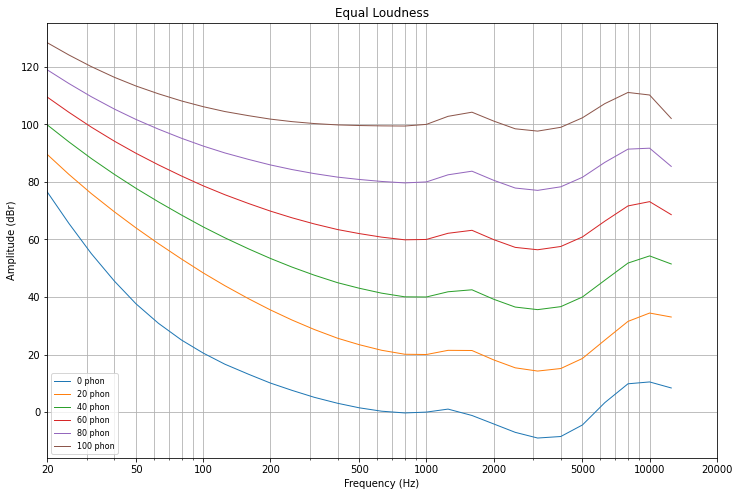

In [31]:
fig = None
ax = None
for i, p in enumerate(range(0, 120, 20)):
    f, g = equal_loudness_contour(p)
    fr = FrequencyResponse(name='Equal Loudness', frequency=f, raw=g)
    fig, ax = fr.plot_graph(fig=fig, ax=ax, show=False, raw_plot_kwargs={'label': f'{p} phon', 'color': f'C{i}'})
plt.show()

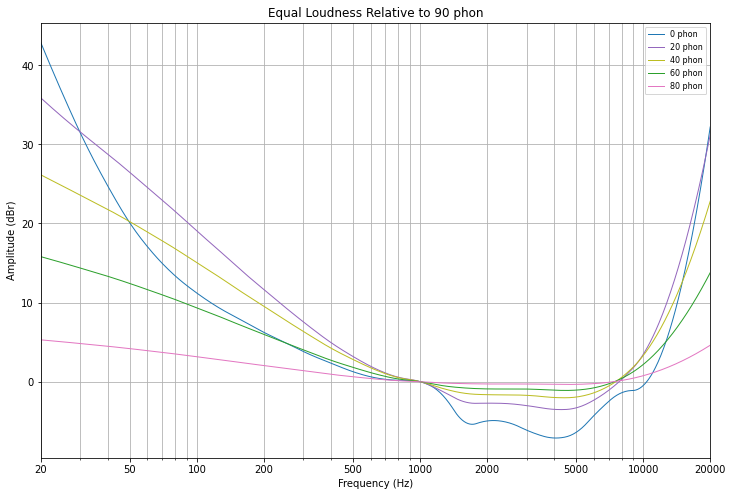

In [49]:
f, g = equal_loudness_contour(90)
phon90 = FrequencyResponse(name='phon90', frequency=f, raw=g)
phon90.interpolate(pol_order=2)
phon90.center()
fig = None
ax = None
for i, p in enumerate(range(0, 90, 5)):
    f, g = equal_loudness_contour(p)
    fr = FrequencyResponse(name='Equal Loudness Relative to 90 phon', frequency=f, raw=g)
    fr.interpolate(pol_order=2)
    fr.center()
    fr.raw -= phon90.raw
    if p % 20 == 0:
        fig, ax = fr.plot_graph(fig=fig, ax=ax, show=False, raw_plot_kwargs={'label': f'{p} phon', 'color': f'C{i}'})
    fr.write_to_csv(ROOT.joinpath(f'research/equal_loudness/{p}vs90_loudness.csv'))
    fr.raw[fr.frequency >= 1000] = 0
    fr.write_to_csv(ROOT.joinpath(f'research/equal_loudness/{p}vs90_loudness_bass_only.csv'))
plt.show()